In [3]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [4]:

#Load data
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
train_ds=tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_ds=tf.data.Dataset.from_tensor_slices((test_images,test_labels))

Preprocessing

In [ ]:
plt.figure(figsize=(30,30))
for i,(image,label) in enumerate(train_ds.take(20)):
    
    ax=plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')

In [8]:
def process_image(image,label):
    image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image,(64,64))
    
    return image,label

In [9]:
train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()
print('Train size:',train_ds_size)
print('Test size:',test_ds_size)

Train size: 50000
Test size: 10000


In [10]:
train_ds=(train_ds
          .map(process_image)
          .shuffle(buffer_size=train_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )
test_ds=(test_ds
          .map(process_image)
          .shuffle(buffer_size=test_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )

Model Implementation

In [11]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')  
    
    
])

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(lr=0.001),
    metrics=['accuracy']    
)
model.summary()

In [14]:
history=model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds,
    validation_freq=1
)

Epoch 1/10
1562/1562 [==============================] - 669s 427ms/step - loss: 1.6088 - accuracy: 0.4174 - val_loss: 1.3854 - val_accuracy: 0.5064
Epoch 2/10
1562/1562 [==============================] - 595s 380ms/step - loss: 1.4686 - accuracy: 0.4718 - val_loss: 1.2936 - val_accuracy: 0.5356
Epoch 3/10
1562/1562 [==============================] - 622s 397ms/step - loss: 1.3498 - accuracy: 0.5139 - val_loss: 1.2280 - val_accuracy: 0.5579
Epoch 4/10
1562/1562 [==============================] - 606s 387ms/step - loss: 1.2553 - accuracy: 0.5509 - val_loss: 1.1467 - val_accuracy: 0.5894
Epoch 5/10
1562/1562 [==============================] - 733s 468ms/step - loss: 1.1804 - accuracy: 0.5807 - val_loss: 1.0946 - val_accuracy: 0.6140
Epoch 6/10
1562/1562 [==============================] - 592s 376ms/step - loss: 1.1041 - accuracy: 0.6076 - val_loss: 1.0540 - val_accuracy: 0.6270
Epoch 7/10
1562/1562 [==============================] - 691s 441ms/step - loss: 1.0426 - accuracy: 0.6309 - val_

In [15]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

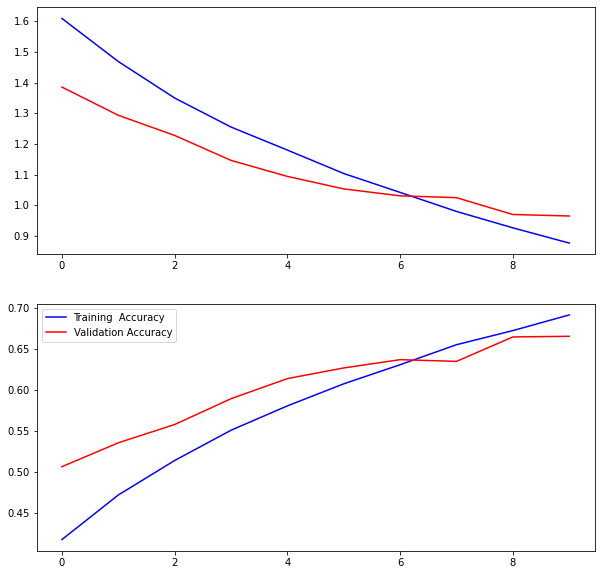

In [16]:
f,ax=plt.subplots(2,1,figsize=(10,10)) 

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [17]:
print('Accuracy Score = ',np.max(history.history['val_accuracy']))

Accuracy Score =  0.6656650900840759
